## load libraries

In [42]:
import os
import keyring
import urllib3
import requests
# import folium

import ipywidgets as widgets

from IPython.display import display

from arcgis.gis import GIS
from arcgis.auth import EsriSession
from arcgis.geocoding import geocode
from arcgis.mapping import WebMap
from arcgis.features import FeatureLayer
from arcgis.mapping import MapImageLayer
from arcgis.raster import ImageryLayer
from arcgis.widgets import MapView

import arcgis.mapping
import arcgis

<!-- 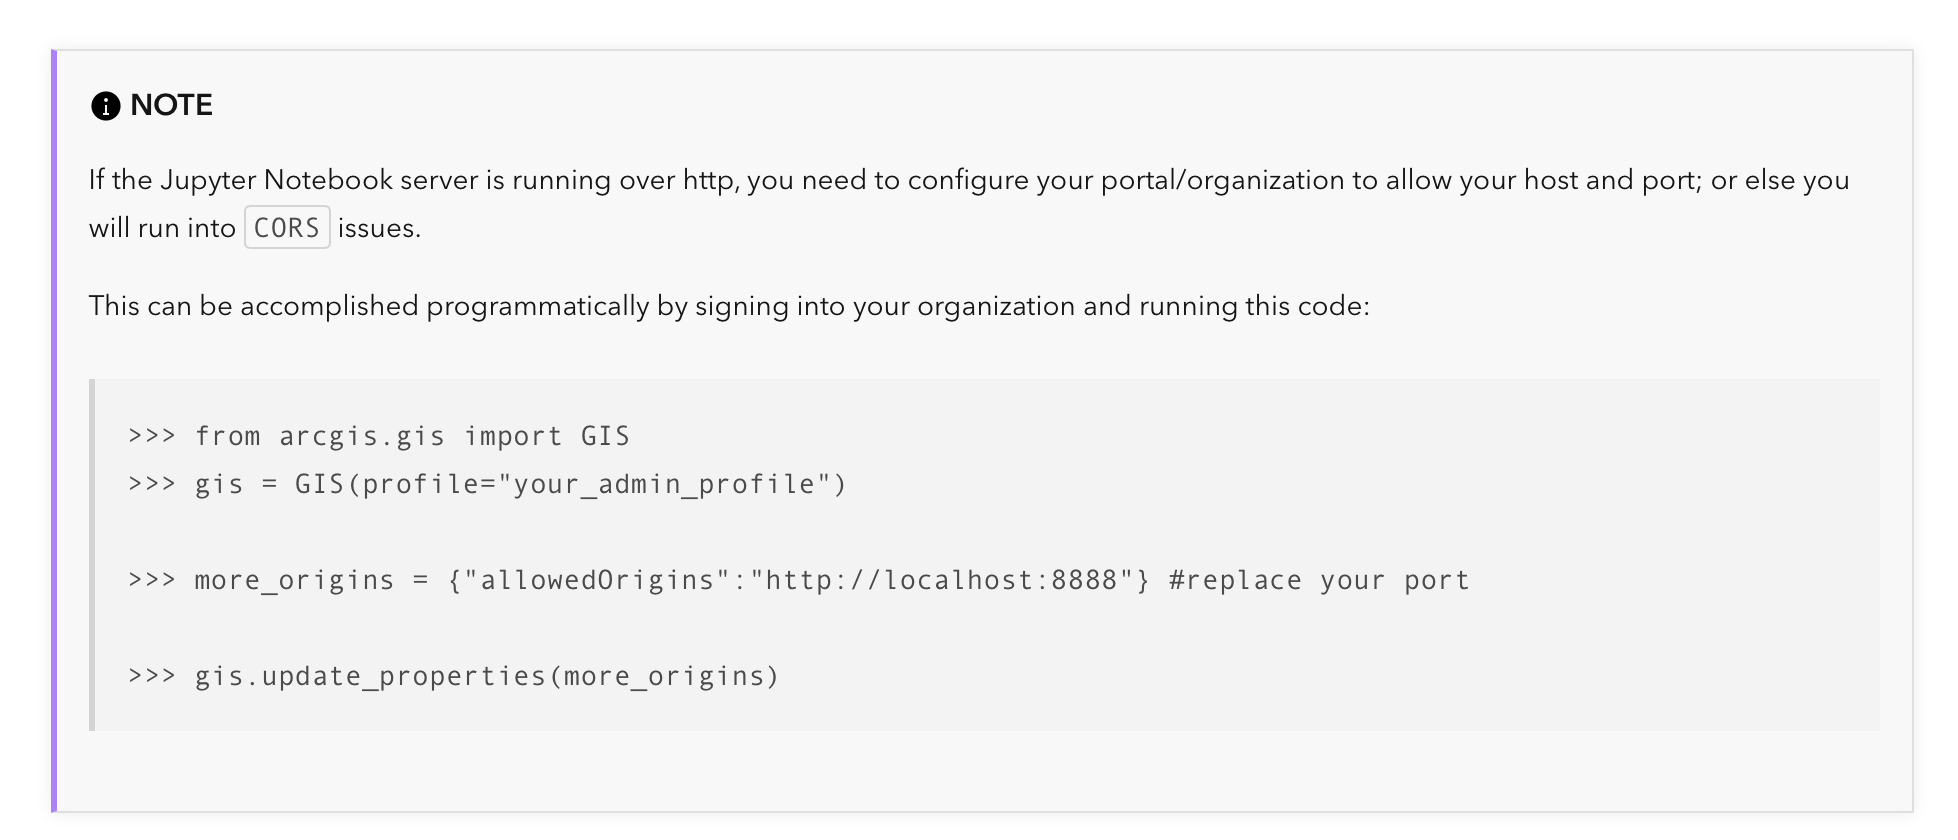 -->

In [2]:
# I keep getting security warnings, but cannot get the gis object to recognize the certificates
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

In [3]:
MapView.set_js_cdn("https://umich.maps.arcgis.com/jsapi4/")
MapView.set_js_cdn("https://js.arcgis.com/4.18/")

In [4]:
# UMich ArcGIS Online URL
org_url = "https://umich.maps.arcgis.com/"

username = 'jqwhite_umich'

In [5]:
client_id = os.getenv('ARCGIS_CLIENT_ID')
client_secret = os.getenv('ARCGIS_CLIENT_SECRET')

if not client_id or not client_secret:
    raise ValueError("Please set the ARCGIS_CLIENT_ID and ARCGIS_CLIENT_SECRET environment variables")

In [6]:
# # OAuth credentials

profile = 'umich_arcgis_siads699'

# # Path to your certificate bundle
cert_path = '/Users/jwhite/umich_cert.pem'  # Update this path to your certificate bundle

# Create a GIS object using OAuth credentials
# gis = GIS(org_url, client_id=client_id, client_secret=client_secret, verify_cert=cert_path)
gis = GIS(org_url, client_id=client_id, client_secret=client_secret)

# can't get profile to work:
# Exception: A general error occurred: cannot access local variable 'code' where it is not associated with a value
# Load the GIS object using the saved profile
# gis = GIS(profile=profile)

In [7]:
gis?

Type:           GIS
String form:    GIS @ https://umich.maps.arcgis.com version:2024.2
File:           ~/miniforge3/envs/arcgis23/lib/python3.11/site-packages/arcgis/gis/__init__.py
Docstring:     
.. _gis:

The ``GIS`` class is representative of a single ArcGIS Online organization or an ArcGIS Enterprise deployment.
The ``GIS`` object provides helper objects to manage (search, create, retrieve) GIS resources such as content, users,
and groups.

Additionally, the ``GIS`` object has properties to query its state, which is accessible using the properties attribute.

.. note::

    The ``GIS`` provides a mapping widget that can be used in the Jupyter Notebook environment for visualizing GIS content
    as well as the results of your analysis. To create a new map, call the :attr:`~arcgis.gis.GIS.map` method.
    IE11 is no longer supported. Please use the latest version of Google Chrome, Mozilla Firefox,
    Apple Safari, or Microsoft Edge.

The constructor constructs a ``GIS`` object give

In [8]:
# restURL not correctly formed.  This fixes it.
gis._portal.resturl = 'https://umich.maps.arcgis.com/sharing/rest/'

In [9]:
# https://developers.arcgis.com/python/api-reference/arcgis.widgets.html
# more_origins = {"allowedOrigins":"http://localhost:8888"} #replace your port
# gis.update_properties(more_origins)

In [10]:
# gis._portal.user_items(owner='jqwhite', folder='jqwhite_umich')
gis.__getstate__()

{'_validate_item_url': False,
 '_use_gen_token': False,
 '_proxy_host': None,
 '_proxy_port': 80,
 '_referer': None,
 '_timeout': 600,
 '_expiration': 60,
 'resturl': 'https://umich.maps.arcgis.com/sharing/rest/',
 '_url': 'https://umich.maps.arcgis.com',
 '_username': None,
 '_password': None,
 '_key_file': None,
 '_cert_file': None,
 '_portal': <arcgis.gis._impl._portalpy.Portal at 0x168193a10>,
 '_con': <arcgis.gis._impl._con._connection.Connection at 0x14e49bc90>,
 '_verify_cert': True,
 '_client_id': 'ntJbWmRxBwawEZjk',
 '_datastores_list': None,
 '_utoken': None,
 '_api_key': None,
 '_properties': {
   "2DStylesGroupQuery": "title:\"Esri 2D Styles\" AND owner:esri_en",
   "3DBasemapGalleryGroupQuery": "title:\"ArcGIS Online 3D Basemaps\" AND owner:esri_en",
   "access": "public",
   "allSSL": true,
   "allowedRedirectUris": [
     "https://arcgis.lsa.umich.edu/portal",
     "https://arcgis1081.lsa.umich.edu/portal"
   ],
   "analysisLayersGroupQuery": "title:\"Living Atlas Analys

In [11]:
gis.properties.name

'University of Michigan'

In [12]:
# gis.properties

In [13]:
user = gis.users.get('jqwhite_umich')
user

<User username:jqwhite_umich>

## test map

In [14]:
# URL of the dataset
dataset_url = "https://apps.fs.usda.gov/arcx/rest/services/RDW_Climate/ClimateChangePressures_PlantHardinessZones/MapServer"

# Access the dataset directly using MapImageLayer
map_layer = MapImageLayer(dataset_url)

In [15]:
map_layer

<MapImageLayer url:"https://apps.fs.usda.gov/arcx/rest/services/RDW_Climate/ClimateChangePressures_PlantHardinessZones/MapServer">

In [16]:
# Get the sublayers within the map service
sublayers = map_layer.properties.layers
for sublayer in sublayers:
    print(f"Sublayer ID: {sublayer.id}, Name: {sublayer.name}")

Sublayer ID: 0, Name: 2070-2099
Sublayer ID: 1, Name: 2070-2099 RCP 8.5
Sublayer ID: 2, Name: 2070-2099 RCP 4.5
Sublayer ID: 3, Name: 2040-2069
Sublayer ID: 4, Name: 2040-2069 RCP 8.5
Sublayer ID: 5, Name: 2040-2069 RCP 4.5
Sublayer ID: 6, Name: 2010-2039
Sublayer ID: 7, Name: 2010-2039 RCP 8.5
Sublayer ID: 8, Name: 2010-2039 RCP 4.5
Sublayer ID: 9, Name: Historical 1980-2009


In [17]:
# Choose a specific sublayer to work with
sublayer_id = 9  # Use the appropriate sublayer ID based on the output above
sublayer = map_layer.layers[sublayer_id]

In [18]:
# Print some information about the sublayer
print(f"Sublayer title: {sublayer.properties.name}")
print(f"Sublayer description: {sublayer.properties.description}")

Sublayer title: Historical 1980-2009
Sublayer description: The maps and tables presented here represent potential variability of projected climate change across the conterminous United States during three 30-year periods in this century and emphasizes the importance of evaluating multiple signals of change across large spatial domains. Maps of growing degree days, plant hardiness zones, heat zones, and cumulative drought severity depict the potential for markedly shifting conditions and highlight regions where changes may be multifaceted across these metrics. In addition to the maps, the potential change in these climate variables are summarized in tables according to the seven regions of the fourth National Climate Assessment to provide additional regional context. Viewing these data collectively further emphasizes the potential for novel climatic space under future projections of climate change and signals the wide disparity in these conditions based on relatively near-term human dec

In [19]:
sublayer.properties

{
  "currentVersion": 11.1,
  "cimVersion": "3.1.0",
  "id": 9,
  "name": "Historical 1980-2009",
  "type": "Raster Layer",
  "description": "The maps and tables presented here represent potential variability of projected climate change across the conterminous United States during three 30-year periods in this century and emphasizes the importance of evaluating multiple signals of change across large spatial domains. Maps of growing degree days, plant hardiness zones, heat zones, and cumulative drought severity depict the potential for markedly shifting conditions and highlight regions where changes may be multifaceted across these metrics. In addition to the maps, the potential change in these climate variables are summarized in tables according to the seven regions of the fourth National Climate Assessment to provide additional regional context. Viewing these data collectively further emphasizes the potential for novel climatic space under future projections of climate change and sig

In [20]:
sublayer.url

'https://apps.fs.usda.gov/arcx/rest/services/RDW_Climate/ClimateChangePressures_PlantHardinessZones/MapServer/9'

In [21]:
historical_layer = MapImageLayer(sublayer.url)

In [22]:
# secure_url = 'https://dev003248.esri.com:6443/arcgis/rest/services/ImgSrv_Landast_Montana2015/ImageServer'

In [23]:
# secure_img_lyr = ImageryLayer(secure_url, gis)

In [24]:
# secure_img_lyr.url

In [25]:
# img_svc_url = 'https://landsat2.arcgis.com/arcgis/rest/services/Landsat8_Views/ImageServer'

In [26]:
# landsat_lyr = ImageryLayer(img_svc_url)

In [27]:
# landsat_lyr

In [28]:
# landsat_lyr.properties

In [29]:
# Create a WebMap and add the sublayer
web_map = WebMap()


# web_map.add_layer(sublayer)
web_map.add_layer(map_layer)

True

In [38]:
# Display the web map
web_map

MapView(hide_mode_switch=True, layout=Layout(height='400px', width='100%'))

In [31]:
! conda list arcgis

# packages in environment at /Users/jwhite/miniforge3/envs/arcgis23:
#
# Name                    Version                   Build  Channel
arcgis                    2.3.1                   py311_9    esri/label/prerelease


In [32]:
! conda list jupyterlab

# packages in environment at /Users/jwhite/miniforge3/envs/arcgis23:
#
# Name                    Version                   Build  Channel
jupyterlab                3.6.7              pyhd8ed1ab_0    conda-forge
jupyterlab_pygments       0.3.0              pyhd8ed1ab_0    conda-forge
jupyterlab_server         2.27.2             pyhd8ed1ab_0    conda-forge
jupyterlab_widgets        1.1.8              pyhd8ed1ab_0    conda-forge


In [40]:
! jupyter labextension list

JupyterLab v3.6.7
/Users/jwhite/miniforge3/envs/arcgis23/share/jupyter/labextensions
        jupyterlab_pygments v0.3.0 enabled  X (python, jupyterlab_pygments)
        @jupyter-widgets/jupyterlab-manager v3.1.8 enabled OK (python, jupyterlab_widgets)


"jupyterlab_pygments@0.3.0" is not compatible with the current JupyterLab
Conflicting Dependencies:
JupyterLab              Extension      Package
>=3.6.7 <3.7.0          >=4.0.8 <5.0.0 @jupyterlab/application




In [34]:
! conda list nodejs

# packages in environment at /Users/jwhite/miniforge3/envs/arcgis23:
#
# Name                    Version                   Build  Channel
nodejs                    22.4.1               h3fe1c63_0    conda-forge


In [39]:
widgets.IntSlider()

IntSlider(value=0)

In [ ]:
# Save the web map
webmap_item_properties = {
    'title': 'Plant Hardiness Zones -  Web Map TEst',
    'snippet': 'Map showing plant hardiness zones for different time periods and RCPs.',
    'tags': ['climate change', 'plant hardiness', 'USDA'],
    'extent': {'xmin': -13894063.944635458, 'ymin': 2883423.2957236213, 'xmax': -7465363.351323909, 'ymax': 6948390.524746953},
    'username': 'jqwhite_umich'
}
new_wm_item = web_map.save(webmap_item_properties)

In [ ]:
web_map?

In [ ]:
# search for content that begin with a prefix - say 'USA'
search_result_USA = gis.content.search(query="title:USA*", outside_org=True)                  
search_result_USA

In [ ]:
# Create a map widget
map1 = gis.map('Paris') # Passing a place name to the constructor
                        # will initialize the extent of the map.

In [ ]:
map1

In [ ]:
usa_map = gis.map('USA', zoomlevel=4)  # you can specify the zoom level when creating a map

In [ ]:
display(usa_map)

In [ ]:
usa_map

In [ ]:
m = folium.Map(zoom_start=4)

In [ ]:
# Assume we want to query the first sublayer for simplicity
sublayer_id = sublayers[1].id
sublayer_url = f"{dataset_url}/{sublayer_id}"

In [ ]:
# Access the sublayer as a FeatureLayer
feature_layer = FeatureLayer(sublayer_url)

# Print the sublayer properties to check available fields and operations
print(feature_layer.properties)

In [ ]:
# # Query the sublayer
# query_result = feature_layer.query(where="1=1", out_fields="*", return_geometry=True)

In [ ]:
# # Convert the query result to GeoJSON
# geojson_data = query_result.to_geojson

# # Create a Folium map and add the GeoJSON data
# map_center = [37.7749, -122.4194]  # Example coordinates, adjust as needed
# m = folium.Map(location=map_center, zoom_start=5)
# folium.GeoJson(geojson_data).add_to(m)

# # Save and display the map
# m.save('map.html')
# m

In [ ]:
# # Add the raster layer to the web map
# dataset_url = "https://apps.fs.usda.gov/arcx/rest/services/RDW_Climate/ClimateChangePressures_PlantHardinessZones/MapServer"
# web_map.add_layer({"url": dataset_url, "title": "Plant Hardiness Zones"})

In [ ]:
me = gis.users.me
me

In [ ]:
# me.access

In [ ]:
# Create a GIS object using OAuth credentials
gis = GIS(org_url, client_id=client_id, client_secret=client_secret)

# Verify authentication
print(f"Logged in as: {gis.properties.user.username}")

# Create a web map
web_map = WebMap()

# Add the raster layer to the web map
dataset_url = "https://apps.fs.usda.gov/arcx/rest/services/RDW_Climate/ClimateChangePressures_PlantHardinessZones/MapServer"
web_map.add_layer({"url": dataset_url, "title": "Plant Hardiness Zones"})

# Save the web map
webmap_item_properties = {
    'title': 'Plant Hardiness Zones - Historical 1980-2009',
    'snippet': 'Map showing plant hardiness zones for different time periods and RCPs.',
    'tags': ['climate change', 'plant hardiness', 'USDA'],
    'extent': {'xmin': -13894063.944635458, 'ymin': 2883423.2957236213, 'xmax': -7465363.351323909, 'ymax': 6948390.524746953}
}

In [ ]:
m = folium.Map(location=[39.8283, -98.5795], zoom_start=5)
tile_url = "https://apps.fs.usda.gov/arcx/rest/services/RDW_Climate/ClimateChangePressures_PlantHardinessZones/MapServer/tile/{z}/{y}/{x}"
folium.TileLayer(tiles=tile_url, attr='USDA Forest Service', name='Plant Hardiness Zones').add_to(m)
folium.LayerControl().add_to(m)
# m.save('map.html')

In [ ]:
# m